In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv("Titanic.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## Using Pandas

In [7]:
# Train_Test_Split
X=df.drop(columns='Survived')
y=df['Survived']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape,X_test.shape

((712, 11), (179, 11))

In [10]:
X_train.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.207865
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.775281
Embarked       0.002809
dtype: float64

In [11]:
mean_age=df['Age'].mean()
median_age=df['Age'].median()

In [12]:
X_train['Age_Mean']=X_train['Age'].fillna(mean_age)
X_train['Age_Median']=X_train['Age'].fillna(median_age)

In [13]:
X_train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Mean,Age_Median
399,400,2,"Trout, Mrs. William H (Jessie L)",female,28.00,0,0,240929,12.6500,NaN,S,28.00,28.00
432,433,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.00,1,0,SC/AH 3085,26.0000,NaN,S,42.00,42.00
207,208,3,"Albimona, Mr. Nassef Cassem",male,26.00,0,0,2699,18.7875,NaN,C,26.00,26.00
377,378,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.5000,C82,C,27.00,27.00
831,832,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,0.83,0.83


In [15]:
print("Orignal Age Variance",X_train['Age'].var())
print("Age variance after median inputation",X_train['Age_Median'].var())
print("Age variance after mean inputation",X_train['Age_Mean'].var())

Orignal Age Variance 204.3495133904614
Age variance after median inputation 162.33852985330878
Age variance after mean inputation 161.813866455868


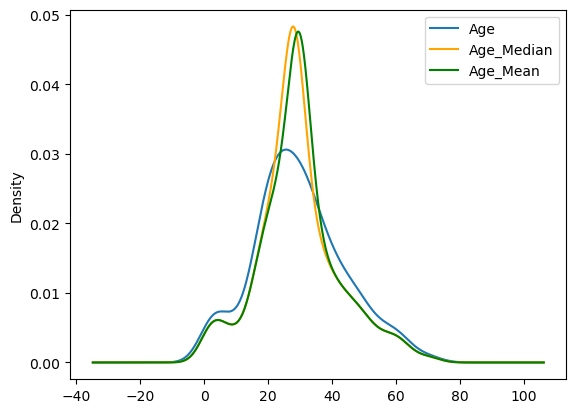

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)

# Orignal variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the median
X_train['Age_Median'].plot(kind='kde',ax=ax,color='orange')

# variable imputed with the mean
X_train['Age_Mean'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


In [24]:
X_train.corr

<bound method DataFrame.corr of      PassengerId  Pclass                                   Name     Sex   Age  \
30            31       1               Uruchurtu, Don. Manuel E    male  40.0   
10            11       3        Sandstrom, Miss. Marguerite Rut  female   4.0   
873          874       3            Vander Cruyssen, Mr. Victor    male  47.0   
182          183       3  Asplund, Master. Clarence Gustaf Hugo    male   9.0   
876          877       3          Gustafsson, Mr. Alfred Ossian    male  20.0   
..           ...     ...                                    ...     ...   ...   
534          535       3                    Cacic, Miss. Marija  female  30.0   
584          585       3                    Paulner, Mr. Uscher    male   NaN   
493          494       1                Artagaveytia, Mr. Ramon    male  71.0   
527          528       1                     Farthing, Mr. John    male   NaN   
168          169       1                    Baumann, Mr. John D    male   NaN

In [26]:
X_train.corr

<bound method DataFrame.corr of      PassengerId  Pclass                                   Name     Sex   Age  \
30            31       1               Uruchurtu, Don. Manuel E    male  40.0   
10            11       3        Sandstrom, Miss. Marguerite Rut  female   4.0   
873          874       3            Vander Cruyssen, Mr. Victor    male  47.0   
182          183       3  Asplund, Master. Clarence Gustaf Hugo    male   9.0   
876          877       3          Gustafsson, Mr. Alfred Ossian    male  20.0   
..           ...     ...                                    ...     ...   ...   
534          535       3                    Cacic, Miss. Marija  female  30.0   
584          585       3                    Paulner, Mr. Uscher    male   NaN   
493          494       1                Artagaveytia, Mr. Ramon    male  71.0   
527          528       1                     Farthing, Mr. John    male   NaN   
168          169       1                    Baumann, Mr. John D    male   NaN

<Axes: >

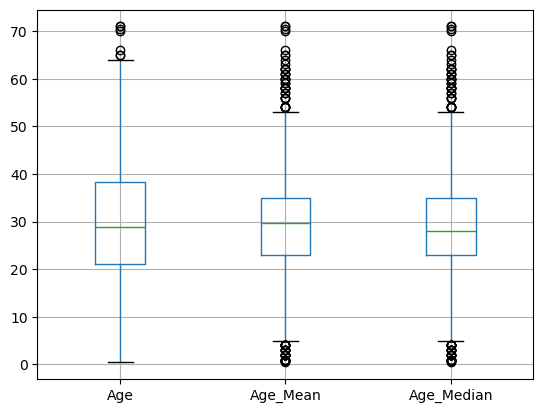

In [27]:
X_train[['Age','Age_Mean','Age_Median']].boxplot()

## Using Sklearn

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
imputer2=SimpleImputer(strategy="most_frequent")
imputer1=SimpleImputer(strategy="median")

In [37]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Embarked']),
],remainder='passthrough')

In [38]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Embarked'])])

In [39]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [40]:
trf.named_transformers_['imputer2'].statistics_

array(['S'], dtype=object)

In [41]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [42]:
X_train

array([[40.0, 'C', 31, ..., 'PC 17601', 27.7208, nan],
       [4.0, 'S', 11, ..., 'PP 9549', 16.7, 'G6'],
       [47.0, 'S', 874, ..., '345765', 9.0, nan],
       ...,
       [71.0, 'C', 494, ..., 'PC 17609', 49.5042, nan],
       [28.75, 'S', 528, ..., 'PC 17483', 221.7792, 'C95'],
       [28.75, 'S', 169, ..., 'PC 17318', 25.925, nan]], dtype=object)